In [1]:
import pickle
import itertools
import open3d as o3d
import numpy as np
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
%matplotlib notebook

In [3]:
with open("curves_by/q_curves/s_112_b20_s50_lmin40_lmax_100_o15_q_1.curves", "rb") as pickle_file:
    s_curve_list = pickle.load(pickle_file)

In [4]:
def rotation_mat(angle):
    Rx = np.array([[1,0,0],
                 [0, np.cos(angle[0]), -np.sin(angle[0])],
                 [0, np.sin(angle[0]), np.cos(angle[0])]])

    Ry = np.array([[np.cos(angle[1]), 0, np.sin(angle[1])],
                 [0,1,0],
                 [-np.sin(angle[1]), 0, np.cos(angle[1])]])

    Rz = np.array([[np.cos(angle[2]), -np.sin(angle[2]), 0],
                 [np.sin(angle[2]), np.cos(angle[2]), 0],
                 [0,0,1]])
    return Rz@Rx@Ry
angle = [np.pi, np.pi, 0] # pcd.rotate()
#angle = [-np.pi/2, np.pi/2, np.pi/2]
R = rotation_mat(angle)
R_mirror = np.array([[-1,0,0],
                    [0,1,0],
                    [0,0,1]])

<IPython.core.display.Javascript object>


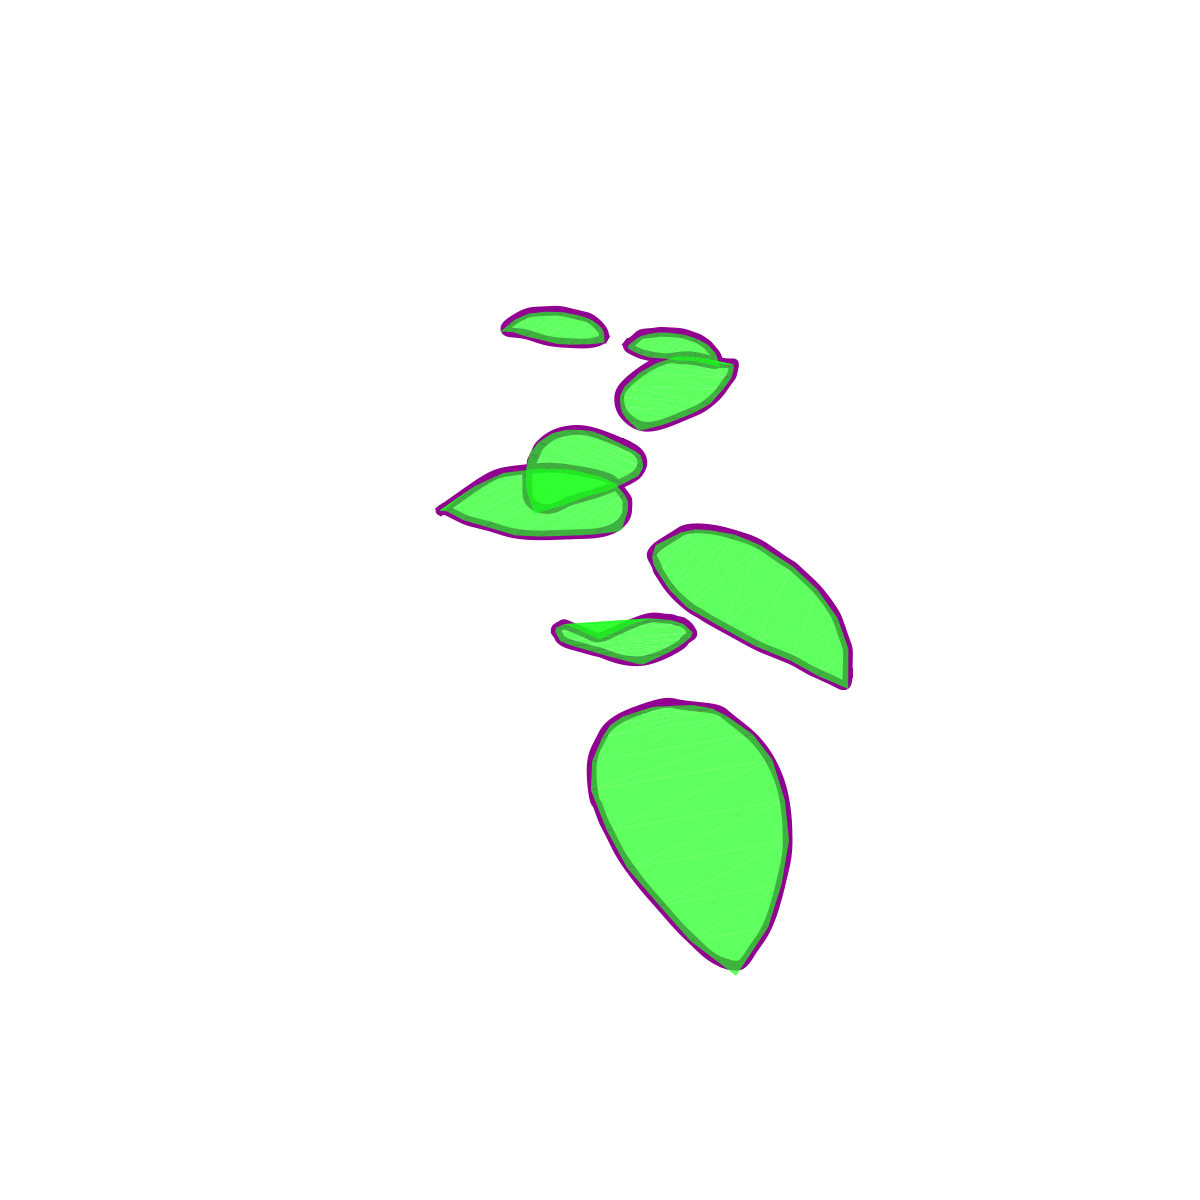

[[ 0.108117 -0.134416  3.532122]
 [ 0.172421 -0.429924  3.554162]
 [ 0.244587 -0.586438  3.551778]
 [ 0.342592 -0.70587   3.5323  ]
 [ 0.545505 -0.904628  3.478245]
 [ 0.799431 -1.044729  3.40207 ]
 [ 1.227727 -1.114305  3.299594]
 [ 1.595907 -1.116796  3.18254 ]
 [ 1.982158 -1.02356   3.054264]
 [ 2.260472 -0.890384  2.886695]
 [ 2.514839 -0.607477  2.674251]
 [ 2.39737  -0.255929  2.903351]
 [ 2.196868 -0.028485  3.080388]
 [ 1.881993  0.209071  3.217348]
 [ 1.544256  0.352654  3.338106]
 [ 1.124263  0.460709  3.441592]
 [ 0.834358  0.434066  3.513389]
 [ 0.566999  0.334148  3.559603]
 [ 0.428282  0.264901  3.574128]
 [ 0.298012  0.152127  3.569443]]
[[-3.065400e-01  1.339020e-01  5.327285e+00]
 [-3.065400e-01  1.149600e-01  5.327285e+00]
 [-2.606980e-01  2.746000e-03  5.352898e+00]
 [-2.201790e-01 -5.355200e-02  5.365089e+00]
 [-1.707570e-01 -9.299700e-02  5.372129e+00]
 [-7.075600e-02 -1.554390e-01  5.379682e+00]
 [ 4.666800e-02 -1.902990e-01  5.382118e+00]
 [ 2.284490e-01 -1.82255

In [8]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.view_init(elev=30, azim=-70)

ax.axis("off")

for i in range(8):
    mesh = o3d.io.read_triangle_mesh("polygon/quan/q_1.ply")
    mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles)[np.asarray(mesh.cluster_connected_triangles()[0])==i])# i
    #mesh.vertices = o3d.utility.Vector3iVector(ver)
    ver = np.asarray(mesh.vertices)[np.unique(np.asarray(mesh.triangles))]
    x, y, z = ver[:,0], ver[:,1], ver[:,2]
    ax.plot_trisurf(x, y, z, color="#1AFF1A", shade=False, alpha=0.7)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(s_curve_list[i])
    pcd.rotate(np.linalg.inv(R),(0,0,0))
    pcd.scale(10,(0,0,0))
    s_c = np.array(pcd.points)
    x_q, y_q, z_q = s_c[:,0], s_c[:,1], s_c[:,2]
    ax.plot(x_q, y_q, z_q,"-",lw=7,color="#920092")



plt.show()

<IPython.core.display.Javascript object>


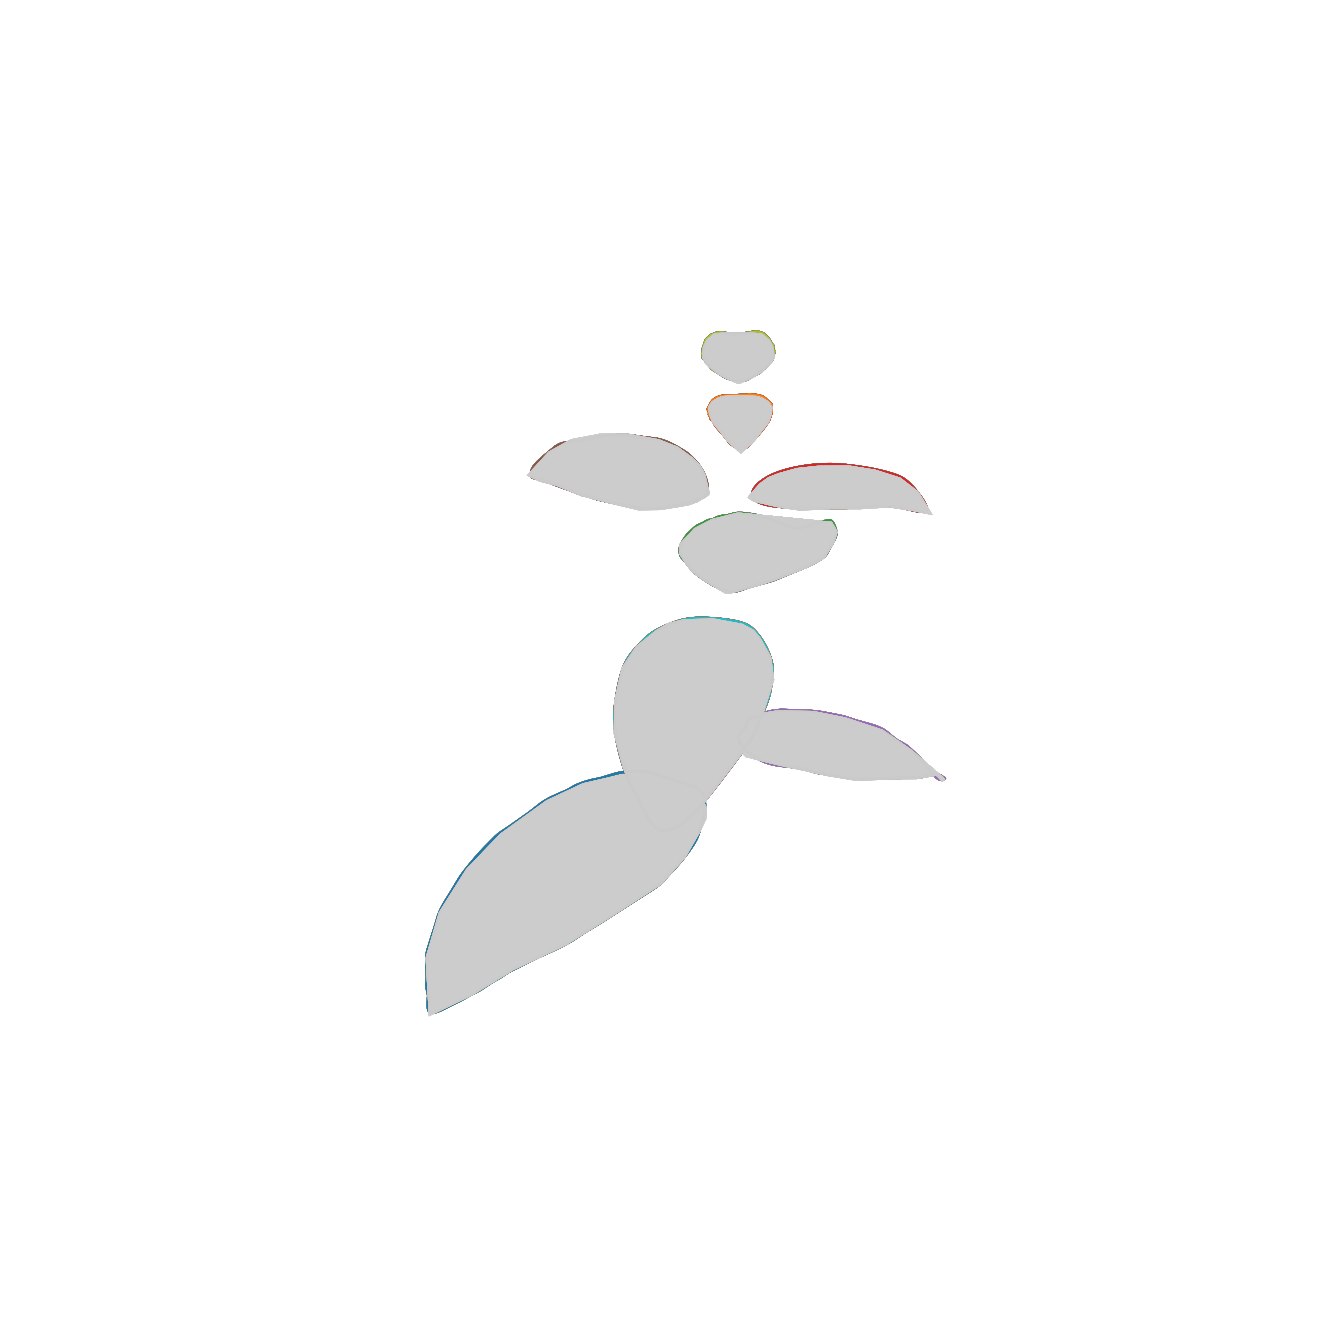

In [81]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
### 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

### 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.axis("off")

def plot_graph():
    for i in range(8):
        mesh = o3d.io.read_triangle_mesh("polygon/quan/q_1.ply")
        mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles)[np.asarray(mesh.cluster_connected_triangles()[0])==i])
        ver = np.asarray(mesh.vertices)[np.unique(np.asarray(mesh.triangles))]
        x, y, z = ver[:,0], ver[:,1], ver[:,2]
        ax.plot_trisurf(x, y, z, color="#CCCCCC", shade=False, alpha=0.4)
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(s_curve_list[i])
        pcd.rotate(np.linalg.inv(R),(0,0,0))
        pcd.scale(10,(0,0,0))
        s_c = np.array(pcd.points)
        x_q, y_q, z_q = s_c[:,0], s_c[:,1], s_c[:,2]
        ax.plot(x_q, y_q, z_q,"-")

def plt_graph3d(angle):
    ax.view_init(azim=angle*5)
    
### アニメーションを作成
ani = FuncAnimation(
    fig,
    func=plt_graph3d,
    frames=72,
    init_func=plot_graph,
    interval=200
)

### imagemagickで作成したアニメーションをGIFで書き出す
ani.save("rolling.gif", writer="pillow", savefig_kwargs={'transparent': True, 'facecolor': 'none'})